<a href="https://colab.research.google.com/github/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/blob/main/notebooks/decison_tree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libary**

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

**1. Load Dataset**

In [2]:
path = 'https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/ramadan_labeled_sentiment.csv'
df = pd.read_csv(path)
df

,tweet_clean,Tweet,sentiment,sentiment_scores,neg,neu,pos,compound
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...,negative,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",0.147,0.853,0.000,-0.4767
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...,positive,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.000,0.714,0.286,0.4939
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...,positive,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.000,0.775,0.225,0.4939
...,...,...,...,...,...,...,...,...
831,"['ya', 'allah', 'please', 'remove', 'procrasti...",ya allah please remove procrastination body ra...,positive,"{'neg': 0.171, 'neu': 0.348, 'pos': 0.481, 'co...",0.171,0.348,0.481,0.8689
832,"['yaqeen', 'launched', 'official', 'urdu', 'yo...",yaqeen launched official urdu youtube channel ...,positive,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.000,0.688,0.312,0.7003
833,"['yasser', 'abu', 'daqqa', 'recently', 'freed'...",yasser abu daqqa recently freed palestinian de...,negative,"{'neg': 0.336, 'neu': 0.494, 'pos': 0.17, 'com...",0.336,0.494,0.170,-0.7506
834,"['young', 'arabs', 'took', 'streets', 'last', ...",young arabs took streets last night shouting a...,negative,"{'neg': 0.19, 'neu': 0.747, 'pos': 0.063, 'com...",0.190,0.747,0.063,-0.6597


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_clean       836 non-null    object 
 1   Tweet             836 non-null    object 
 2   sentiment         836 non-null    object 
 3   sentiment_scores  836 non-null    object 
 4   neg               836 non-null    float64
 5   neu               836 non-null    float64
 6   pos               836 non-null    float64
 7   compound          836 non-null    float64
dtypes: float64(4), object(4)
memory usage: 52.4+ KB


**2. Data Preprocessing**

Konversi label ke numerik


In [4]:
df['sentiment'] = df['sentiment'].map({'positi': 1, 'negative' : 0})

Handle missing values

In [5]:
print('Missing values:\n', df.isnull().sum())

Missing values:
 tweet_clean           0
Tweet                 0
sentiment           446
sentiment_scores      0
neg                   0
neu                   0
pos                   0
compound              0
dtype: int64


In [6]:
df = df.dropna(subset=['tweet_clean', 'sentiment'])
print('\nMissing values after treatment:\n', df.isnull().sum())


Missing values after treatment:
 tweet_clean         0
Tweet               0
sentiment           0
sentiment_scores    0
neg                 0
neu                 0
pos                 0
compound            0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 834
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_clean       390 non-null    object 
 1   Tweet             390 non-null    object 
 2   sentiment         390 non-null    float64
 3   sentiment_scores  390 non-null    object 
 4   neg               390 non-null    float64
 5   neu               390 non-null    float64
 6   pos               390 non-null    float64
 7   compound          390 non-null    float64
dtypes: float64(5), object(3)
memory usage: 27.4+ KB


**3. Feature Engineering**

Gabungkan list kata menjadi string

In [8]:
df['text_processed'] = df['tweet_clean'].apply(
    lambda x: ' '.join(eval(x)) if isinstance(x, str) else ''
)

<ipython-input-8-1ce0ab69bc5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_processed'] = df['tweet_clean'].apply(


**4. TF-IDF Vectorization**

In [9]:
tfidf = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    stop_words='english'
)

X = tfidf.fit_transform(df['text_processed'])
y = df['sentiment']

**5. Train-Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # Pertahankan distribusi kelas
)

**6. Model Training dengan Hyperparameter Tuning**

In [11]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [12]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    dt, param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

**7. Evaluasi Model**

In [13]:
y_pred = best_dt.predict(X_test)

print('\Best Parameters:', grid_search.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

\Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



Confusin Matrix

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


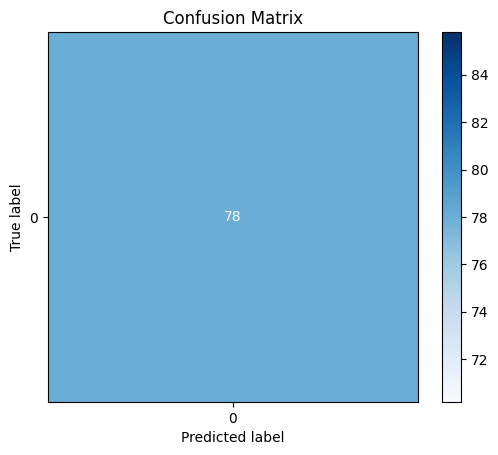

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**8. Visualisasi Decision Tree (Pohon Kecil)**

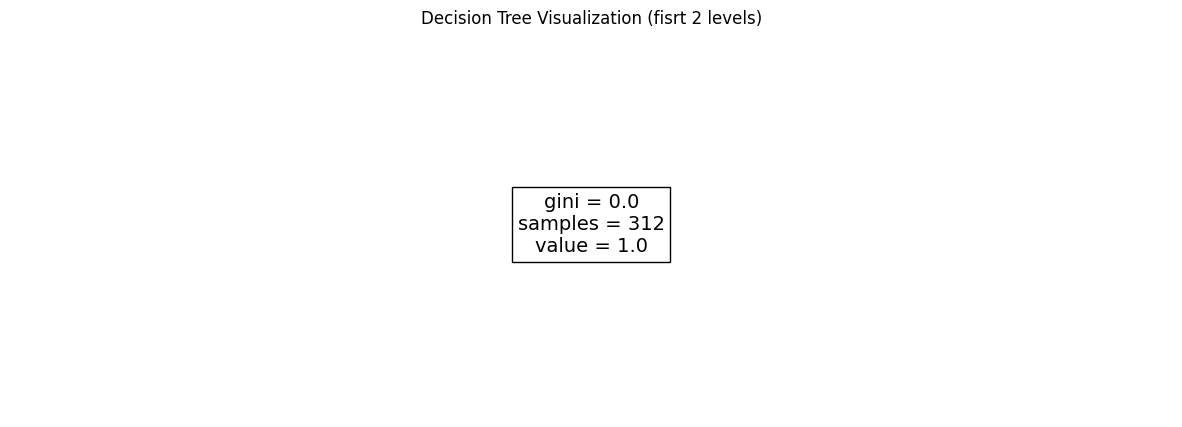

In [27]:
plt.figure(figsize=(15, 5))
plot_tree(
    best_dt,
    filled=True,
    feature_names = tfidf.get_feature_names_out(),
    class_names=['Negative', 'Positive'],
    max_depth=2,
    fontsize=14
)

plt.title('Decision Tree Visualization (fisrt 2 levels)', )
plt.show()

**9. Feature Importance Analysis**



Top 20 Important Features:
                feature  importance
999    zealand pakistan         0.0
0     abducted murdered         0.0
1                 abdul         0.0
2          abdul caught         0.0
3                  able         0.0
4            able north         0.0
5                 abraj         0.0
6              abraj al         0.0
983               young         0.0
982           yesterday         0.0
981                 yes         0.0
980               years         0.0
979            year old         0.0
978                year         0.0
977               wrong         0.0
976  worrying financial         0.0
975            worrying         0.0
974               world         0.0
973             working         0.0
972                word         0.0


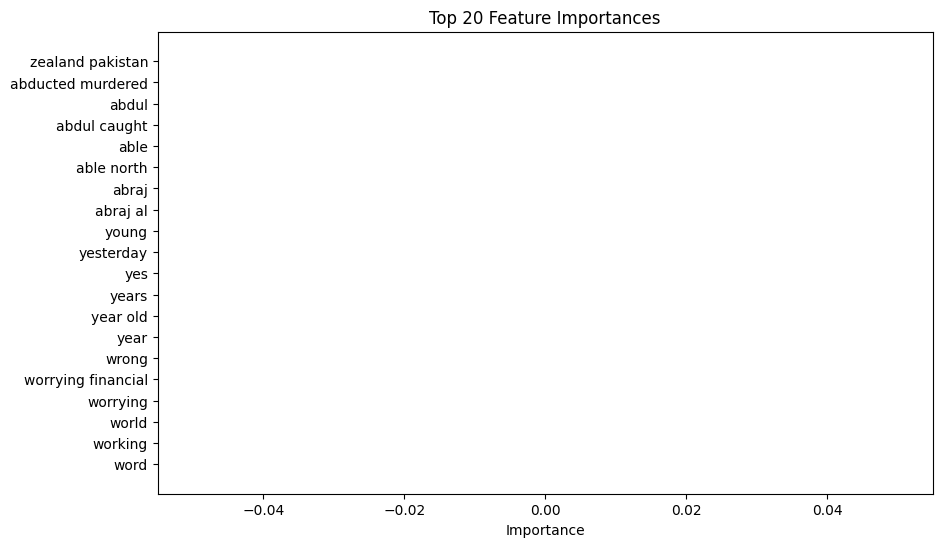

In [28]:
feature_importances = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False).head(20)

print("\nTop 20 Important Features:")
print(feature_importances)

# Visualisasi Feature Importance
plt.figure(figsize=(10,6))
plt.barh(
    feature_importances['feature'],
    feature_importances['importance'],
    color='skyblue'
)
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.show()